# Directed Search 

By executing the dike_model_optimization file for 5 seeds over the 5 scenarios found with Scenario Discovery, 857 policies were generated. We simulated the 857 policies over the 5 scenarios to come up with 4285 experiments. We then reduced these experiments back to 857 policies by picking the median over the sampled scenarios per policy. The policies are now robust against all scenarios that are more favourable to our desired outcomes. 

We then used the Epsilon_nondominated function from the ema_workbench to find the Pareto optimal solutions. 34 solutions were found, which we then reduced back to 16 by setting some constraints. We then picked our 5 best policies based on the preferences of water board three and the results of the debates.  

In [1]:
import pandas as pd
from ema_workbench import load_results
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from ema_workbench.analysis import parcoords 

from ema_workbench.em_framework.optimization import epsilon_nondominated, to_problem
from problem_formulation_project_final import get_model_for_problem_formulation

## Convergence metrics

Convergence metrics are used to determine whether the optimization process has converged. The optimization is determined by two main variables that heavily influence the found policies per scenario: epsilon and the amount of nfe. The nfe value is set to 20.000 and the epsilon value is set to 0.1 for all outcomes. 

Like the example in the ema_workbench, we used the following metrics: hypervolume, epsilon progress, generational distance, epsilon indicator, inverted generational distance, and spacing. 

In [2]:
convergence_files = [f'data/directed_search/convergence/convergence_data_seed_{i}_scenario_{j}.csv' for i in range(0, 5) for j in range(0, 5)]
metrics_files = [f'data/directed_search/metrics/metrics_seed_{i}.csv' for i in range(0, 5)]

convergences = [pd.read_csv(file) for file in convergence_files]
metrics_by_seed = [pd.read_csv(file) for file in metrics_files]


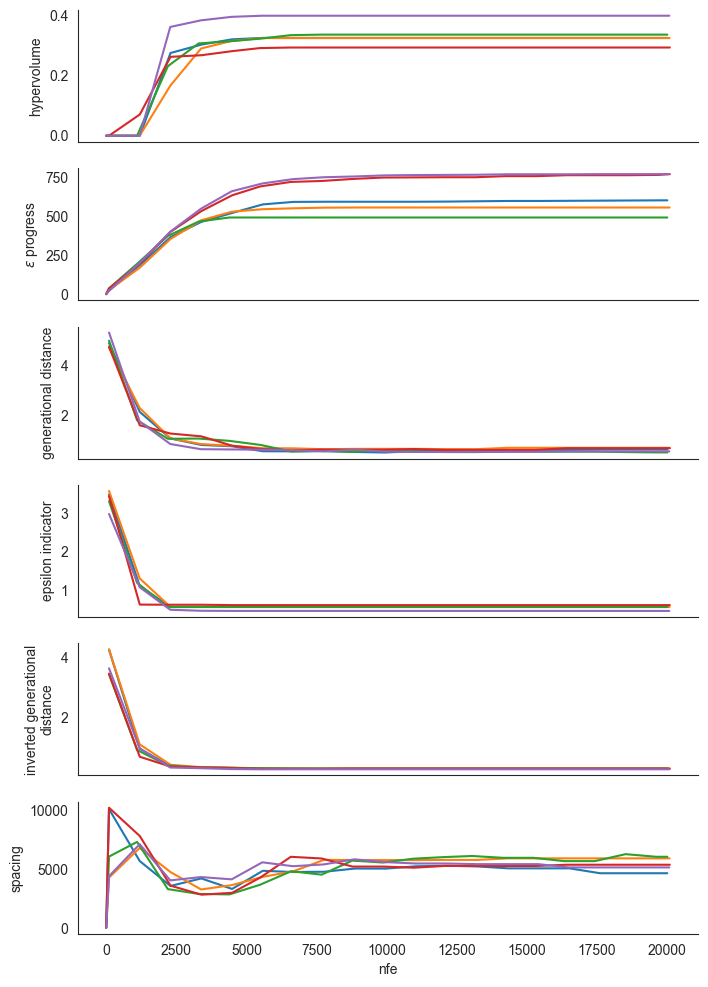

In [3]:
sns.set_style("white")
fig, axes = plt.subplots(nrows=6, figsize=(8, 12), sharex=True)

ax1, ax2, ax3, ax4, ax5, ax6 = axes

for metrics, convergence in zip(metrics_by_seed, convergences):
    ax1.plot(metrics.nfe, metrics.hypervolume)
    ax1.set_ylabel("hypervolume")

    ax2.plot(metrics.nfe, convergence.epsilon_progress)
    ax2.set_ylabel("$\epsilon$ progress")

    ax3.plot(metrics.nfe, metrics.generational_distance)
    ax3.set_ylabel("generational distance")

    ax4.plot(metrics.nfe, metrics.epsilon_indicator)
    ax4.set_ylabel("epsilon indicator")

    ax5.plot(metrics.nfe, metrics.inverted_gd)
    ax5.set_ylabel("inverted generational\ndistance")

    ax6.plot(metrics.nfe, metrics.spacing)
    ax6.set_ylabel("spacing")

ax6.set_xlabel("nfe")


sns.despine(fig)

#plt.savefig('convergence metrics.png', bbox_inches='tight')

plt.show()

All convergence metrics seem to be stabilizing at around 10.000 nfe, the convergence metrics spacing however at around 19.000. It could be argued that it also stabilizes at around 10.000 but that the lines are just not as flat as the other graphs. 

However, overall, most convergence metrics show stabilization for the amount of nfe used. This strenghtens the robustness of the policies found with directed search. 

## MOEA - Robust policies over the 5 chosen scenarios

In [4]:
# Load the CSV file into a DataFrame
file_path = 'data/dike_model_combined_results.csv'
df_moea = pd.read_csv(file_path)


In [5]:
# Drop unnecessary columns for aggregation
columns_to_drop = ['scenario', 'policy', 'policy_name', 'model', 'discount rate 0', 'discount rate 1', 'discount rate 2',
       'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate',
       'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail',
       'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax',
       'A.5_pfail', 'A.5_Brate']
#create clean df because we use df_moea later on for merging back the policy_name
df_moea_clean = df_moea.drop(columns=columns_to_drop)

In [6]:
df_moea_clean


,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1.660682e+08,0.000000e+00,61400000.0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,3.268739e+08,0.000000e+00,61400000.0
2,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,3.995024e+08,0.000000e+00,61400000.0
3,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,3.694289e+08,0.000000e+00,61400000.0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,2.152593e+09,0.000000e+00,61400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,7,9,2.341807e+06,2.879840e+07,0.0
4281,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,7,9,5.064083e+06,2.879840e+07,0.0
4282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,7,9,0.000000e+00,2.879840e+07,0.0
4283,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,7,9,5.233692e+07,2.879840e+07,0.0


#### We use the median policy over the 5 scenarios because this is more robust against outliers in the data than for example the mean.

In [7]:
# Define the number of scenarios (assuming it's known as 5)
num_scenarios = 5

# Calculate the number of policies
num_policies = len(df_moea_clean) // num_scenarios

# Create a list to hold aggregated data
aggregated_data = []

# Iterate over each policy
for i in range(num_policies):
    # Calculate the start and end index for each policy block of 5 rows
    start_idx = i * num_scenarios
    end_idx = (i + 1) * num_scenarios
    
    # Select the data for the current policy block
    policy_data = df_moea_clean.iloc[start_idx:end_idx]
    
    # Calculate median for each column (excluding non-numeric columns)
    median_values = policy_data.median()
    
    # Append the median values to the aggregated list
    aggregated_data.append(median_values)

# Create a DataFrame from the aggregated data
combined_df = pd.DataFrame(aggregated_data)


# Plot all 857 policies

<Figure size 1200x800 with 0 Axes>

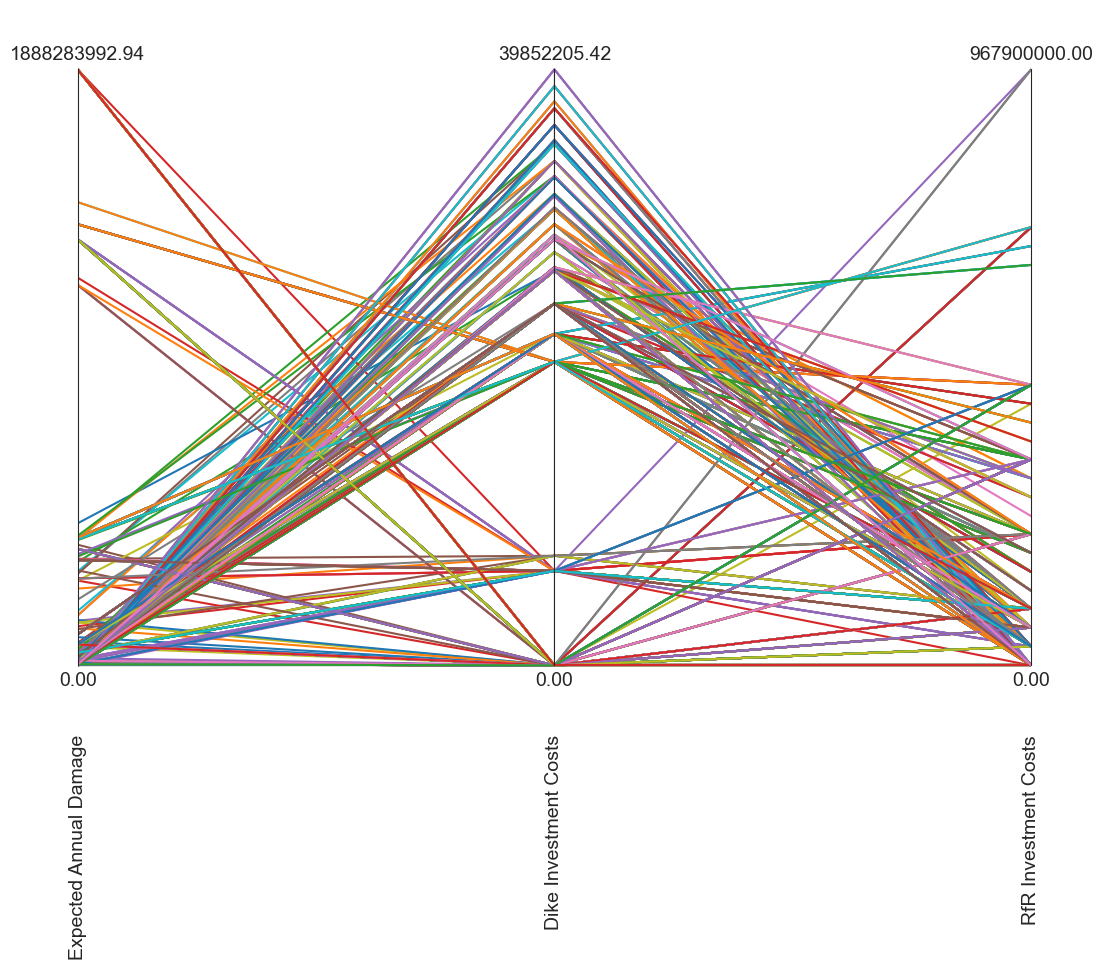

In [8]:
outcomes = combined_df.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

## Pick pareto optimal solutions

In [9]:
model, steps = get_model_for_problem_formulation(8)

epsilon = [0.1, 0.1, 0.1]
problem = to_problem(model, searchover="levers")
pareto_optimal_df = epsilon_nondominated([combined_df], epsilon, problem)

print(len(pareto_optimal_df))

34


# Plot Pareto front

<Figure size 1200x800 with 0 Axes>

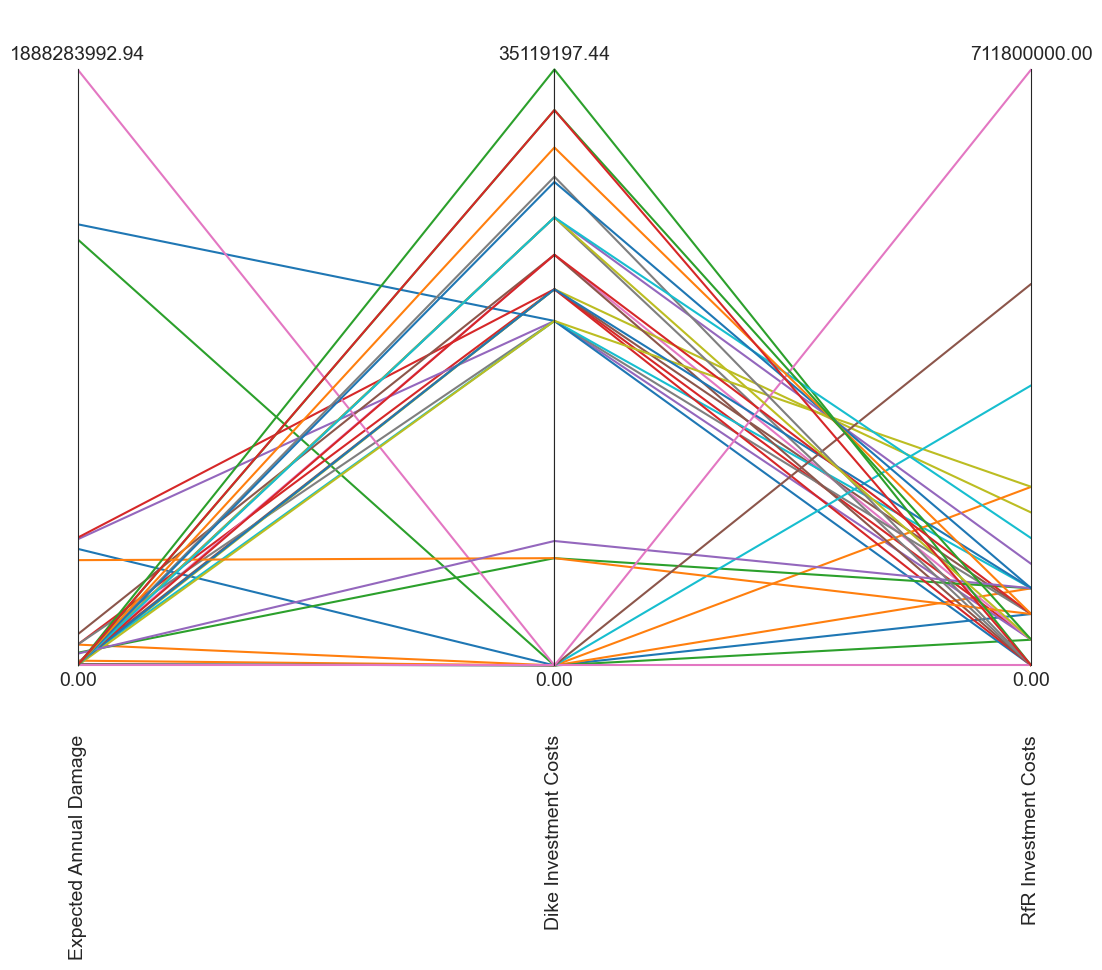

In [10]:
outcomes = pareto_optimal_df.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]


limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

# Start reducing down to set of preferred policies

#### First step: The obvious 7 highest expected annual damages will not be acceptable as a policy, they are dropped

In [11]:
# Sort the DataFrame by 'Expected Annual Damage' in descending order
pareto_optimal_df1 = pareto_optimal_df.sort_values(by='Expected Annual Damage', ascending=True)

# Drop the rows with the 7 highest values in 'Expected Annual Damage'
pareto_optimal_df1 = pareto_optimal_df1.iloc[:-7]

# Reset index if needed
pareto_optimal_df1 = pareto_optimal_df1.reset_index(drop=True)


In [12]:
len(pareto_optimal_df1)

27

In [13]:
outcomes1 = pareto_optimal_df1.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

#### Second step: No RfR investment is in stride with the goals of water board three and therefore all policies where RfR investment costs where zero are dropped

In [14]:
# Filter rows where 'RfR Investment Costs' is not equal to 0
pareto_optimal_df1 = pareto_optimal_df1[pareto_optimal_df1['RfR Investment Costs'] != 0]

# Reset index if needed
pareto_optimal_df1 = pareto_optimal_df1.reset_index(drop=True)


#### The policy with the highest RfR cost is unfeasible because of the large number of investment cost. It is dropped too.

In [15]:
# Sort the DataFrame by 'RfR Investment Costs' in descending order
pareto_optimal_df1 = pareto_optimal_df1.sort_values(by='RfR Investment Costs', ascending=False)

# Drop the row with the highest value in 'RfR Investment Costs'
pareto_optimal_df1 = pareto_optimal_df1.iloc[1:]  # Assuming you want to drop the top row

# Reset index if needed
pareto_optimal_df1 = pareto_optimal_df1.reset_index(drop=True)

#### The five policies with the highest dike investment costs are dropped because they do not correspond with the goals of water board three.


In [16]:
# Sort the DataFrame by 'Dike Investment Costs' in descending order
pareto_optimal_df1 = pareto_optimal_df1.sort_values(by='Dike Investment Costs', ascending=False)

# Drop the top 5 rows with the highest values in 'Dike Investment Costs'
pareto_optimal_df1 = pareto_optimal_df1.iloc[5:]

# Reset index if needed
pareto_optimal_df1 = pareto_optimal_df1.reset_index(drop=True)



#### This leaves 16 pareto optimal solutions left. We will pick 5 distinct policies that fit either the goals of the water board 3 or could work in  alliances of multiple parties.

<Figure size 1200x800 with 0 Axes>

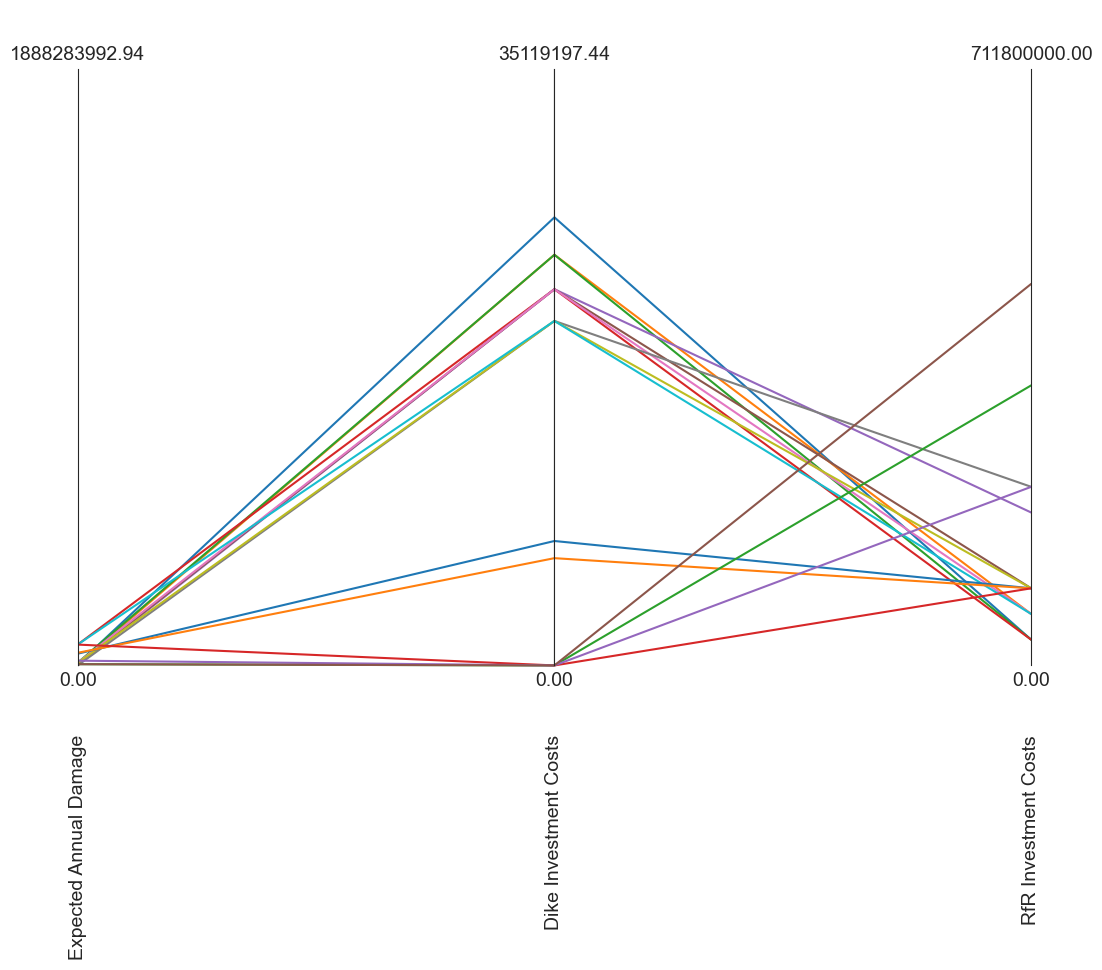

In [17]:
outcomes1 = pareto_optimal_df1.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes1)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

### First pick: Lowest possible value for all outcomes.

It is the policy with the lowest absolute difference between investing in the dikes and investing in RfR too.

In [18]:
# Sort the DataFrame by 'Expected Annual Damage', 'Dike Investment Costs', and 'RfR Investment Costs' in ascending order
pareto_optimal_df1_sorted = pareto_optimal_df1.sort_values(by=['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs'])

# Select the top row (lowest values for 'Expected Annual Damage', 'Dike Investment Costs', and 'RfR Investment Costs')
best_policy = pareto_optimal_df1_sorted.head(1)

<Figure size 1200x800 with 0 Axes>

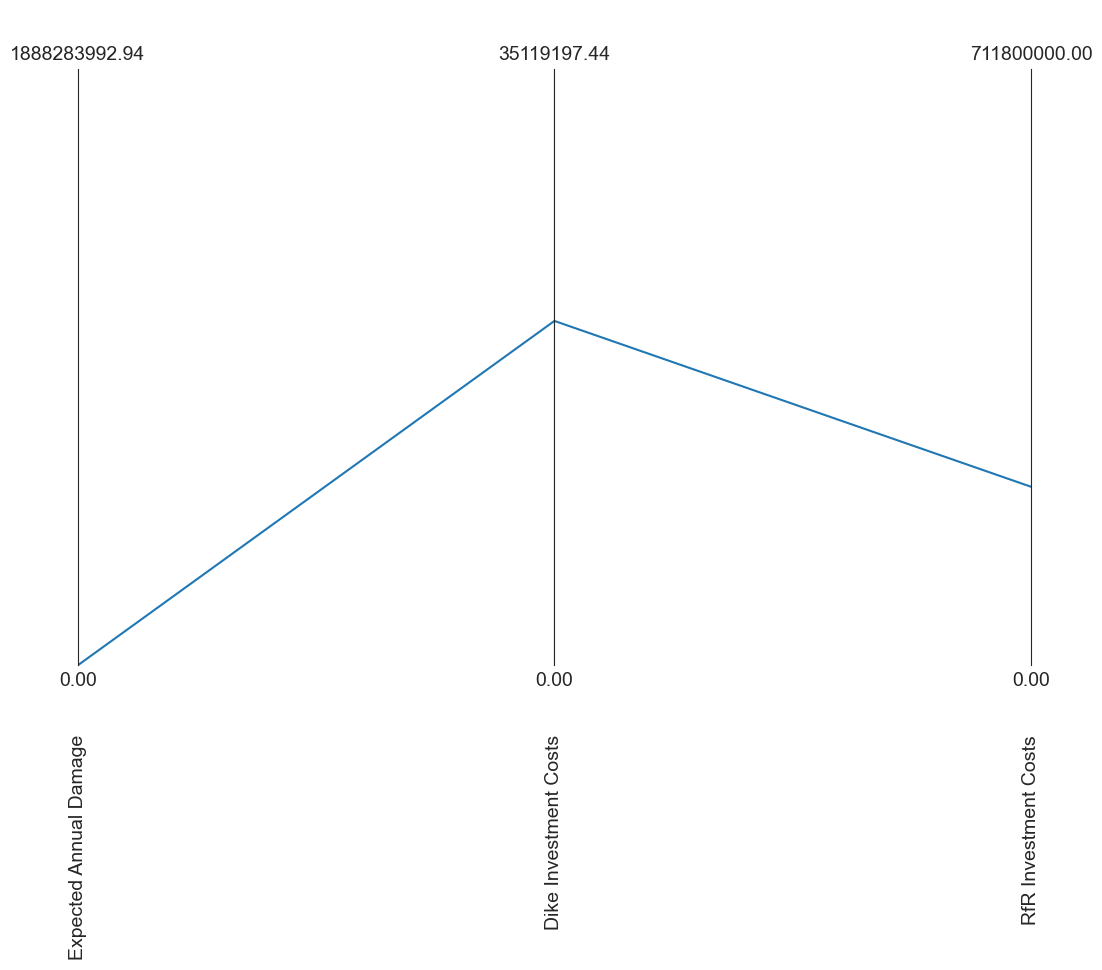

In [19]:
outcomes2 = best_policy.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes2)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

### Second pick: No investment in the dikes, just RfR. Still lowest possible expected annual damage


In [20]:
filtered_df = pareto_optimal_df1[pareto_optimal_df1['Dike Investment Costs'] == 0]

# Find the policy with the lowest 'Expected Annual Damage' and 'RfR Investment Costs'
best_policy2 = filtered_df.loc[filtered_df['Expected Annual Damage'].idxmin()]

best_policy2 = best_policy2.to_frame().T

In [21]:
best_policy2

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.0,455700000.0


In [22]:
best_policies = pd.concat([best_policy, best_policy2], ignore_index=True)

In [23]:
best_policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0


<Figure size 1200x800 with 0 Axes>

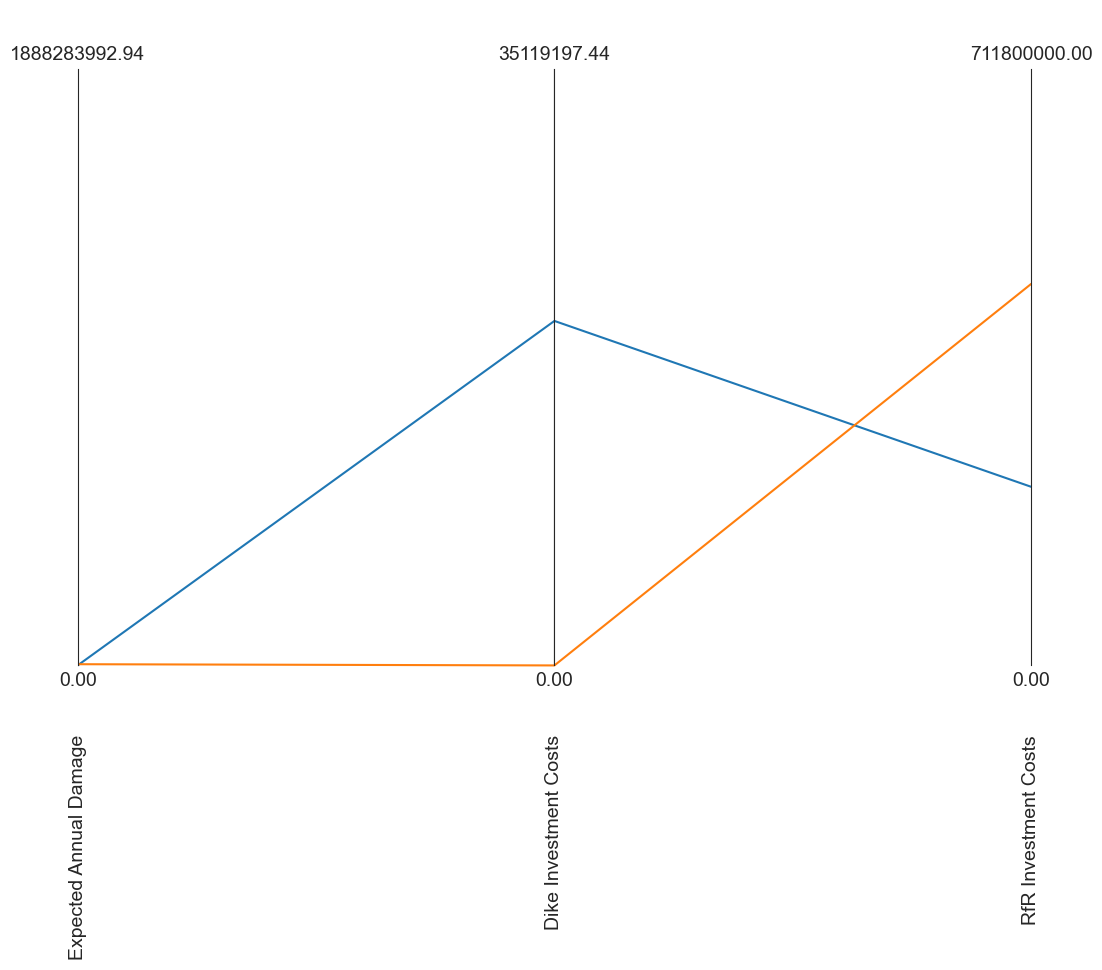

In [24]:
outcomes3 = best_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes3)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

In [25]:
pareto_optimal_df1

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,5,4,6,3.633646e+06,2.640338e+07,30700000.0
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,5,2,7,3.642508e+06,2.419803e+07,61400000.0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,6,0,8.370736e+06,2.419803e+07,30700000.0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,7,1,0,6.596758e+07,2.216782e+07,30700000.0
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,4,3,1,0.000000e+00,2.216782e+07,182600000.0
5,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,4,7,7,3.642508e+06,2.216782e+07,92100000.0
6,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,6,6,0,8.222057e+06,2.216782e+07,61400000.0
7,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,4,2,5,0.000000e+00,2.029929e+07,213300000.0
8,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,4,10,1,7.865832e+06,2.029929e+07,92100000.0
9,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,6,10,4,6.596739e+07,2.029929e+07,61400000.0



### Third pick: third lowest expected annual damage 

In [26]:
pareto_optimal_df1['Absolute Difference'] = abs(pareto_optimal_df1['Dike Investment Costs'] - pareto_optimal_df1['RfR Investment Costs'])

pareto_optimal_df1 = pareto_optimal_df1.sort_values(by='Absolute Difference', ascending=False)

second_best_policy = pareto_optimal_df1.iloc[[7]]

best_policies = pd.concat([best_policies, second_best_policy], ignore_index=True)

best_policies



,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Absolute Difference
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,5.0,4.0,7.0,3.712002e+07,7.332080e+06,92100000.0,8.476792e+07


<Figure size 1200x800 with 0 Axes>

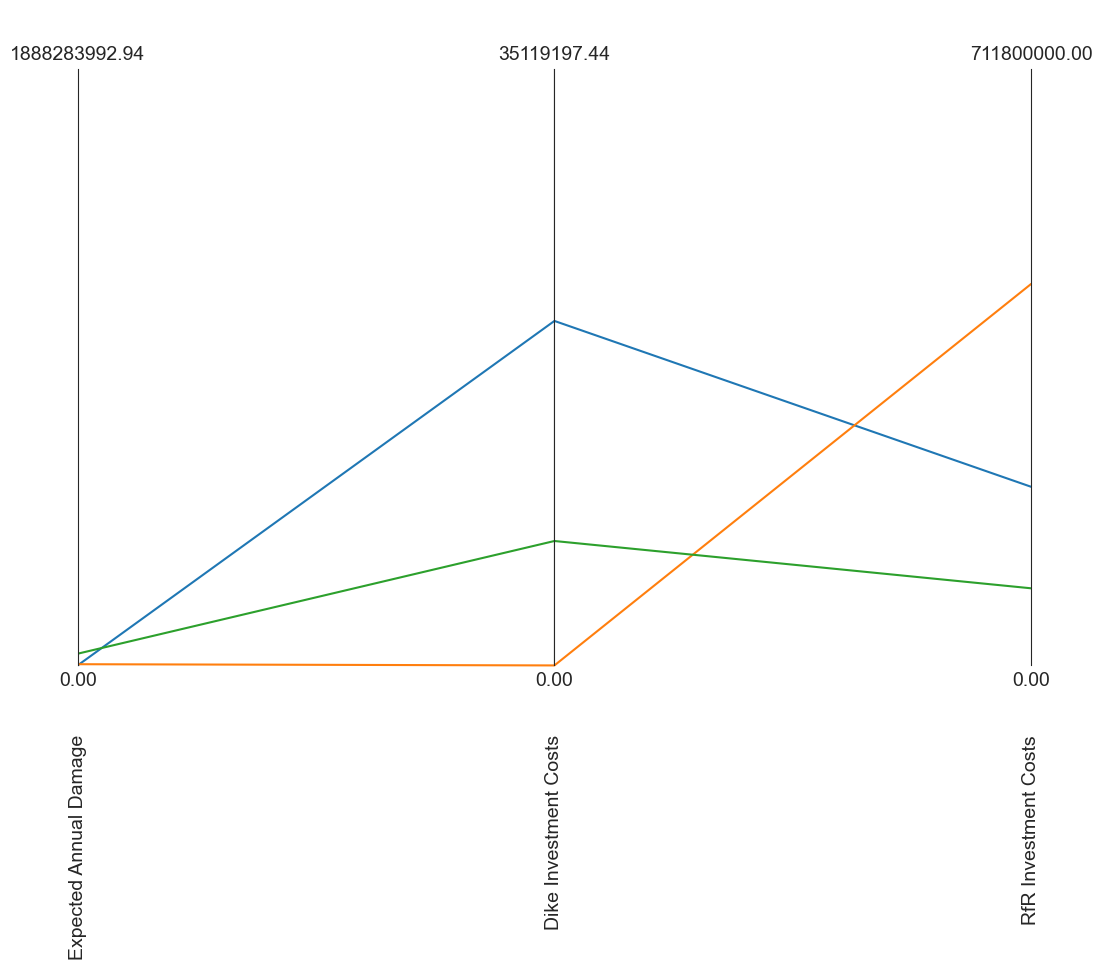

In [27]:

outcomes3 = best_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes3)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

### Fourth Pick: 15 million in damage but decent rfr budget. Probably not desirable, but reasonable? 

In [28]:
second_best_policy1 = pareto_optimal_df1.iloc[[2]]

best_policies = pd.concat([best_policies, second_best_policy1], ignore_index=True)

best_policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Absolute Difference
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,5.0,4.0,7.0,3.712002e+07,7.332080e+06,92100000.0,8.476792e+07
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,5.0,7.0,1.504282e+07,0.000000e+00,213300000.0,2.133000e+08


<Figure size 1200x800 with 0 Axes>

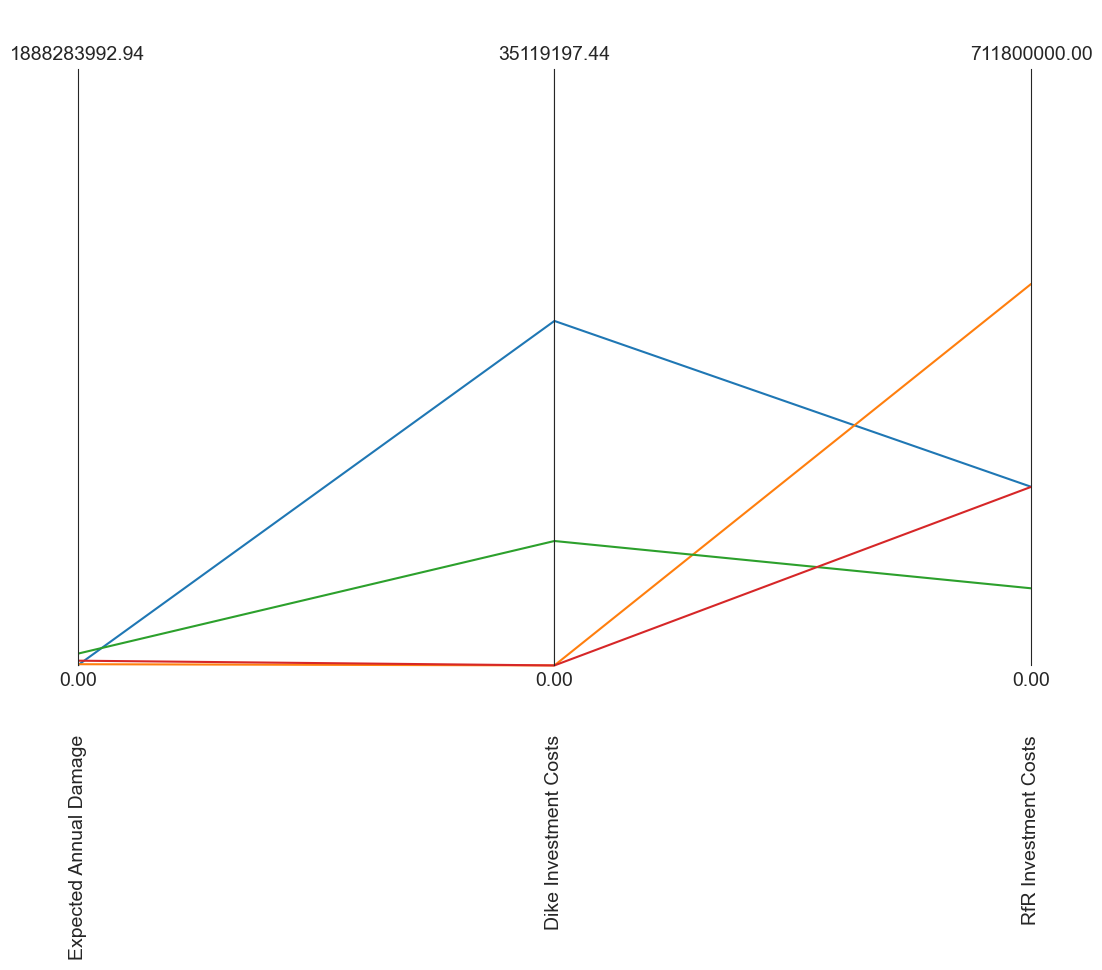

In [29]:
outcomes3 = best_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes3)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

### Fifth pick: low expected annual damage and heavy investment in the dikes. Little bit into RfR. 

This could be a scenario where the budget goes into the direction of other parties.

In [30]:
second_best_policy3 = pareto_optimal_df1.iloc[[15]]

best_policies = pd.concat([best_policies, second_best_policy3], ignore_index=True)

best_policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Absolute Difference
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,0.0,5.0,4.0,7.0,3.712002e+07,7.332080e+06,92100000.0,8.476792e+07
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,5.0,7.0,1.504282e+07,0.000000e+00,213300000.0,2.133000e+08
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,4.0,6.0,3.633646e+06,2.640338e+07,30700000.0,4.296620e+06


<Figure size 1200x800 with 0 Axes>

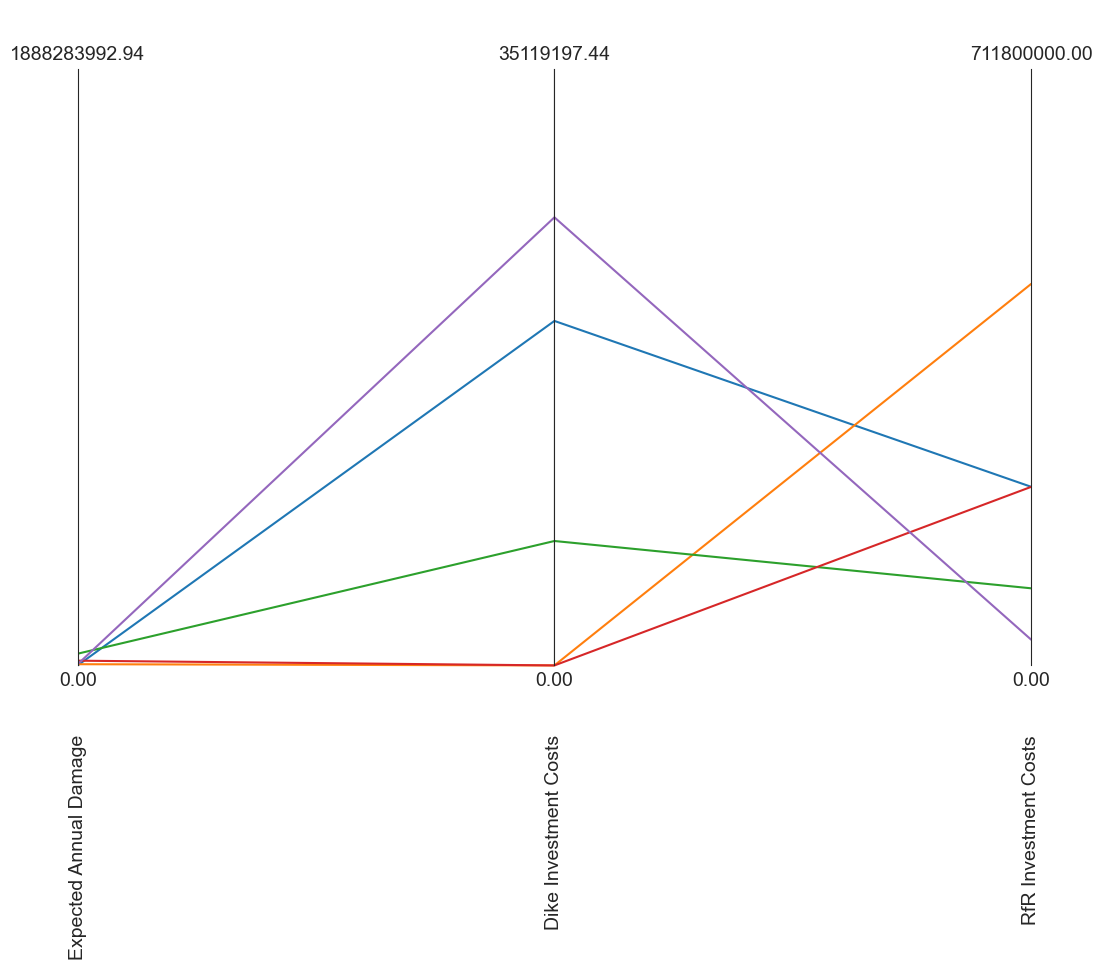

In [31]:
outcomes3 = best_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
plt.figure(figsize=(12, 8))
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes3)
plt.subplots_adjust(left=0.01, right=1.5, top=1.5, bottom=0.01)
plt.show()

In [32]:
df_moea.columns
columns_to_drop = ['discount rate 0', 'discount rate 1', 'discount rate 2',
       'A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_pfail', 'A.1_Brate',
       'A.2_Bmax', 'A.2_pfail', 'A.2_Brate', 'A.3_Bmax', 'A.3_pfail',
       'A.3_Brate', 'A.4_Bmax', 'A.4_pfail', 'A.4_Brate', 'A.5_Bmax',
       'A.5_pfail', 'A.5_Brate','scenario', 'policy', 'model']

In [33]:
df_moea = df_moea.drop(columns=columns_to_drop)

In [34]:
df_moea.columns

Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'Expected Annual Damage', 'Dike Investment Costs',
       'RfR Investment Costs', 'policy_name'],
      dtype='object')

In [35]:
columns_merge = ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'Expected Annual Damage', 'Dike Investment Costs',
       'RfR Investment Costs']

best_policies = pd.merge(best_policies, df_moea, on=columns_merge)


In [36]:
best_policies = best_policies.drop_duplicates()


## Final dataframe with the five picked policies

In [37]:
best_policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Absolute Difference,policy_name
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0,NaN,policy_34
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0,NaN,policy_138
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,5.0,4.0,7.0,3.712002e+07,7.332080e+06,92100000.0,8.476792e+07,policy_133
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,2.0,5.0,7.0,1.504282e+07,0.000000e+00,213300000.0,2.133000e+08,policy_13
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,5.0,4.0,6.0,3.633646e+06,2.640338e+07,30700000.0,4.296620e+06,policy_157


In [38]:
#best_policies.to_csv('5_best_policies.csv')

C:\Users\daann\anaconda3.1\envs\mbdm\Lib\site-packages\ema_workbench\analysis\parcoords.py:220: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


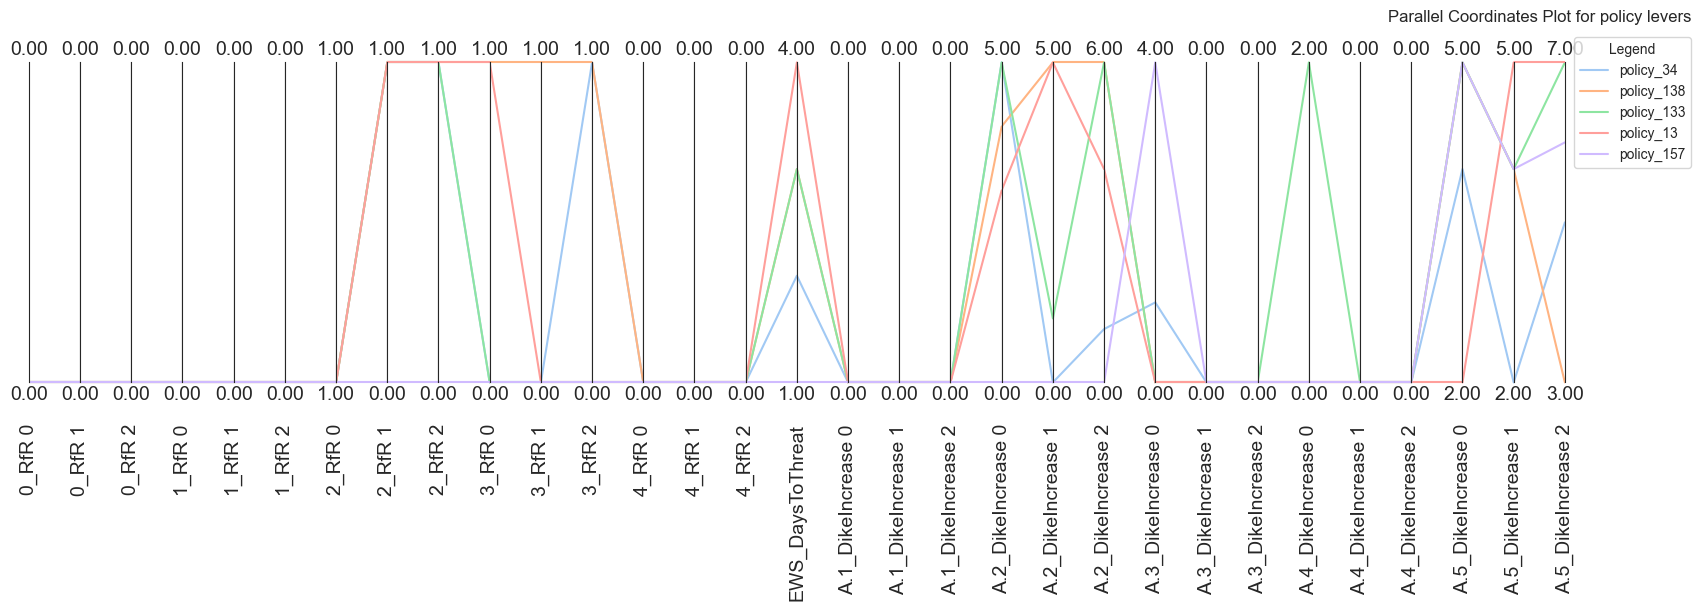

In [39]:
outcomes4 = best_policies.loc[:, ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2']]

limits = parcoords.get_limits(outcomes4)
axes = parcoords.ParallelAxes(limits)


# Create a list of labels for the legend based on the policy_name column
legend_labels = best_policies['policy_name'].tolist()

# Plot the parallel coordinates plot
for i, (index, row) in enumerate(best_policies.iterrows()):
    color = sns.color_palette("pastel", len(best_policies))[i]
    axes.plot(row.drop('policy_name').to_frame().T, label=row['policy_name'], color=color)

# Manually create the legend using plt.legend()
plt.legend(title='Legend', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='best')

# Set the title and adjust the subplot
plt.title('Parallel Coordinates Plot for policy levers')
plt.subplots_adjust(left=0.1, right=2.5, top=0.9, bottom=0.1)

# Save the plot as an image
#plt.savefig('levers_final_5_policies.png', bbox_inches='tight')
plt.show()

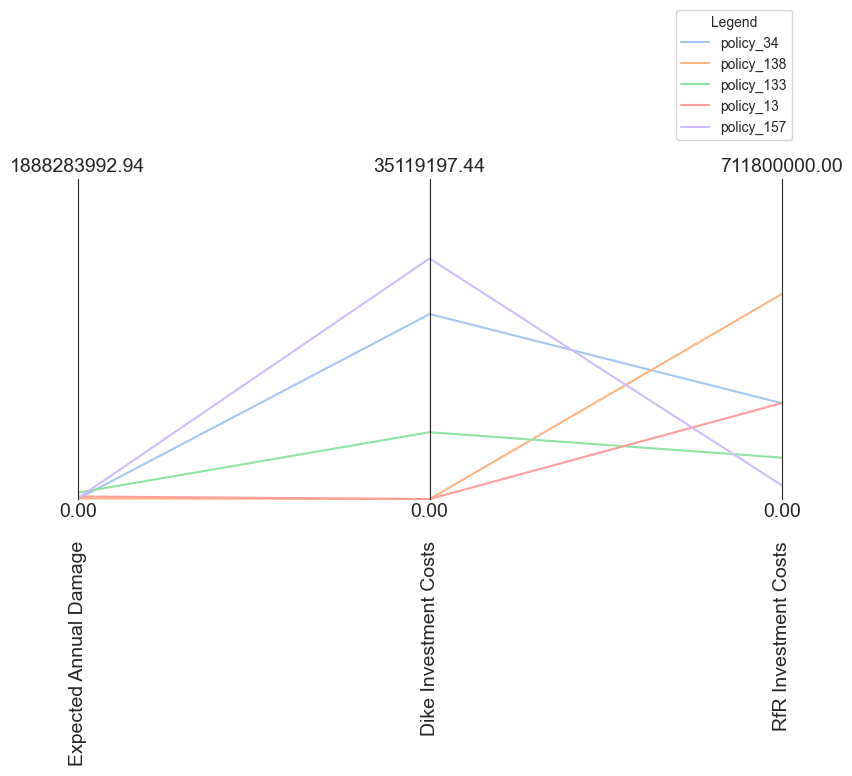

In [40]:
outcomes3 = best_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)

# Create a list of labels for the legend based on the policy_name column
legend_labels = best_policies['policy_name'].tolist()

# Plot the parallel coordinates plot
for i, (index, row) in enumerate(best_policies.iterrows()):
    color = sns.color_palette("pastel", len(best_policies))[i]
    axes.plot(row.drop('policy_name').to_frame().T, label=legend_labels, color=color)

# Manually create the legend using plt.legend()
plt.legend(title='Legend', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='lower right')

# Set the title and adjust the subplot
#plt.title('Parallel Coordinates Plot for policy levers', loc='left', pad = 20,  x=0.0, y=1.05)
plt.subplots_adjust(left=0.1, right=1.2, top=0.9, bottom=0.1)

# Save the plot as an image
#plt.savefig('final_5_policies_with_Legend.png', bbox_inches='tight')
plt.show()

### Plot the graph with policy 1 through 5 in the legend

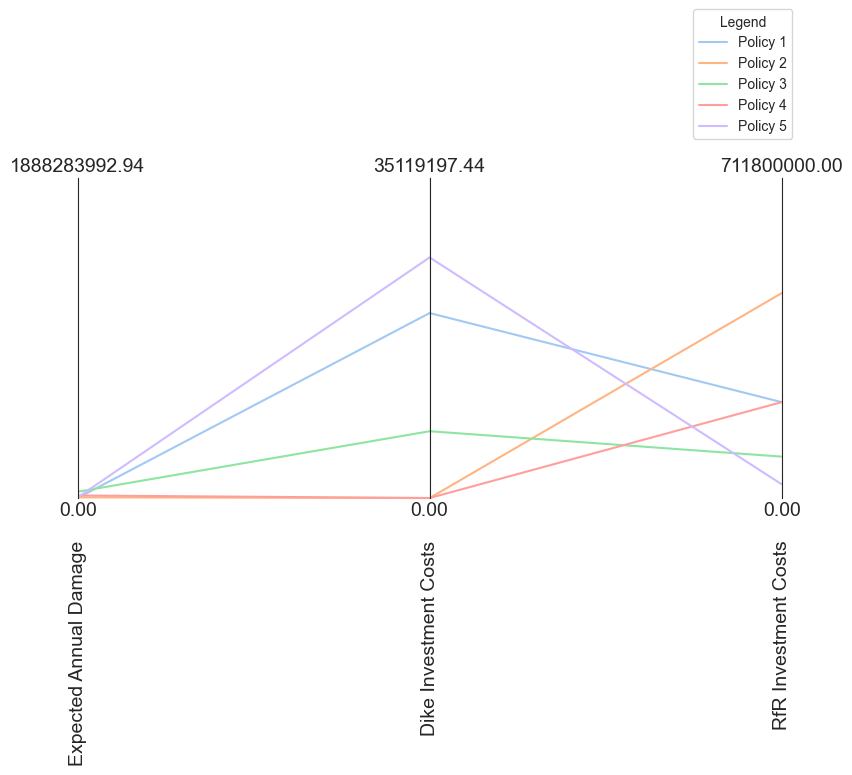

In [41]:
outcomes3 = best_policies.loc[:, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs']]

limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)

# Create a copy of the DataFrame
best_policies_plot = best_policies.copy()

# Add a new column 'Policy Label' for plotting purposes
best_policies_plot['policy_label'] = ['Policy 1', 'Policy 2', 'Policy 3', 'Policy 4', 'Policy 5']

# Create a list of labels for the legend based on the policy_name column
legend_labels = best_policies_plot['policy_label'].tolist()

# Plot the parallel coordinates plot
for i, (index, row) in enumerate(best_policies.iterrows()):
    color = sns.color_palette("pastel", len(best_policies_plot))[i]
    axes.plot(row.drop('policy_name').to_frame().T, label=legend_labels, color=color)

# Manually create the legend using plt.legend()
plt.legend(title='Legend', labels=legend_labels, bbox_to_anchor=(1.05, 1), loc='lower right')

# Set the title and adjust the subplot
#plt.title('Parallel Coordinates Plot for policy levers', loc='left', pad = 20,  x=0.0, y=1.05)
plt.subplots_adjust(left=0.1, right=1.2, top=0.9, bottom=0.1)

# Save the plot as an image
#plt.savefig('final_5_policies_with_Legend.png', bbox_inches='tight')
plt.show()

### Plotting the total costs per policy

In [42]:
# Add a new column 'Total Cost' which is the sum of the three cost-related columns
best_policies_plot['Total Cost'] = best_policies_plot['Dike Investment Costs'] + best_policies_plot['RfR Investment Costs'] + best_policies_plot['Expected Annual Damage']

In [43]:
best_policies_plot

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Absolute Difference,policy_name,policy_label,Total Cost
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,4.0,2.0,5.0,0.000000e+00,2.029929e+07,213300000.0,NaN,policy_34,Policy 1,2.335993e+08
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,5.0,4.0,3.0,3.867582e+06,0.000000e+00,455700000.0,NaN,policy_138,Policy 2,4.595676e+08
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,5.0,4.0,7.0,3.712002e+07,7.332080e+06,92100000.0,8.476792e+07,policy_133,Policy 3,1.365521e+08
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,2.0,5.0,7.0,1.504282e+07,0.000000e+00,213300000.0,2.133000e+08,policy_13,Policy 4,2.283428e+08
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,5.0,4.0,6.0,3.633646e+06,2.640338e+07,30700000.0,4.296620e+06,policy_157,Policy 5,6.073703e+07


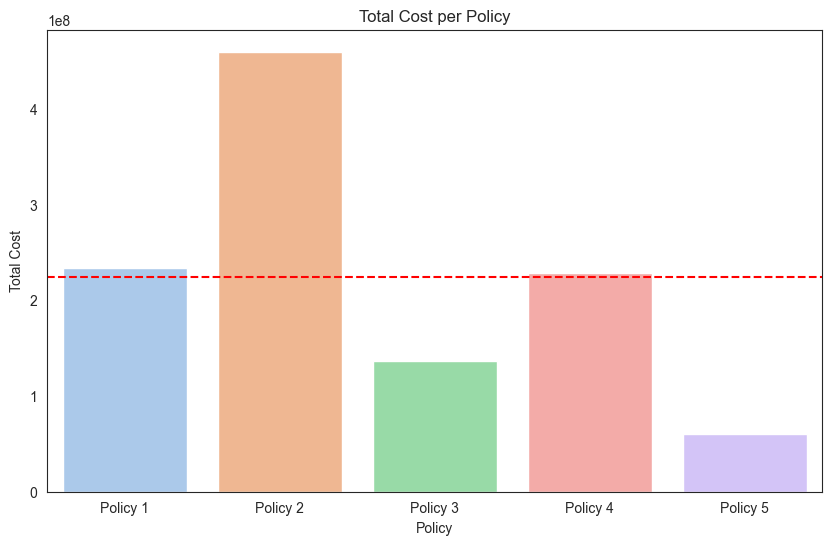

In [44]:
# Plotting the total cost per policy
mean_total_cost = best_policies_plot['Total Cost'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='policy_label', y='Total Cost', data=best_policies_plot, palette='pastel', hue='policy_label', dodge=False, legend=False)

# Set title and labels
plt.title('Total Cost per Policy')
plt.xlabel('Policy')
plt.ylabel('Total Cost')

plt.axhline(mean_total_cost, color='red', linestyle='--', label=f'Mean Total Cost: {mean_total_cost:.2f}')

#plt.savefig('Total cost per policy.png', bbox_inches='tight')
# Show the plot
plt.show()